# Numpy

- np.array : numpy형태의 리스트로 바뀌어서 계산 가능
- 차원

# Sound

- pure tone의 합으로 복잡한 sound 만듦
- pure tone은 단순한 sin, cos
- phasor: sinusoidal을 만들어 내는 것, cos함수와 sin 함수, 논항에 degree 아닌 radian값 들어가야 함 0~2*π(π=3.14...) 이때 0 은 0도 2파이는 360도

Q. 0부터 100파이까지 sin이나 cos곡선 그리면 총 몇번의 반복? 50번

Q. Θ = 3/2 ㅠ라 하면 cos(Θ)/sin(Θ)는?

오일러 공식[Euler's formula]

- e^Θi = cos(Θ) + sin(Θ)i
- e : 상수, 숫자값, i = 2.71... 파이처럼 무리수
- i : imaginary 허수
- f(Θ) = e^Θi= 숫자값(= a + bi 복소수) Θ가 변함에 따라서 output도 바뀜 
- 모든 수는 a + bi의 형태로 표현이 가능함
- Θ = 0 = 1(1, 0), ㅠ/2 = i(0, 1), ㅠ = -1(-1, 0), 3/2ㅠ = -i(0, -1) ...반복
- 오일러 공식의 output을 어떻게 표현?
- 복소수를 표현하는 방법 (1) complex plane x축 a y축 b 

Projection
- 실수의 변화만 보겠다, 허수 부분은 상관 x -> 위에서 보면 됨
- 허수의 변화만 보겠다 -> 옆에서 i에만 projection시켜서 보면 됨
- 우리가 실수를 볼 때 cos(1부터 시작) 허수만 볼 때 sin(0부터 시작)


공통적으로 input은 Θ(radian, 각도값)

frequency: 1초에 몇번 왔다갔다 하는가

Q. sin(Θ)라고 쓰고 각도값이 변한다고 할 때 여기에 '시간'의 개념이 들어갈까 안들어갈까? 그냥 각도값일 뿐 시간의 개념 안들어가있음 시간의 개념이 포함되어야지 1초에 몇번 왔다갔다해서 소리의 높이가 결정됨 시간의 개념이 정확하게 정의되어있지 않으면 소리의 높이를 어떻게 할 수가 없음 *각도 개념 뿐만아니라 시간의 개념이 들어있어야 함*

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

변수명 설정하기
- amp 진폭
- sampling rate 정의
- duration 몇 초 동안 소리가 나는지
- frequency 1초 동안 몇 번 왔다갔다?(1초에 태극문양 몇번 들어가는가)

*sampling rate와 frequency의 단위 모두 Hz(per 1 second)*


In [3]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [4]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

- 제일 먼저 시간 설정해야 함; time이 없으면 소리 만들수 없음 내가 필요한 만큼 만들 것 ex. t = 0.0001 0.0002 0.0003 ... 0.5000 
- time을 얼만큼 잘게 쪼개서 할건가에 대한 해상도 
- 1초 동안 time 몇 개의 ticks가 들어갈까 0.5까지 만들면 되니까 dur = 0.5 총 10000개가 필요하니 sr는 10000 
- t = np.arange(1, sr+1) 1에서 10000개가 만들어짐 만약 이 경우 dur이 1초라 하면 1초동안 이 sr로 만들어지는 time tick의 숫자는 같아짐 이걸 어떻게 0.5로 바꿀 것인가 -> dur 곱하기: t = np.arange(1, sr*dur+1) 제일 마지막꺼는 안쓰므로 +1해야 함 -> time tick이 나오게 하려면 sr로 나눠주어야 함 1/10000부터 0.5초까지 만들어지게 됨
- 1.000e-04 1 X 1/10000 

In [5]:
# generate phase
theta = t * 2*np.pi * freq   

- 위에서 time을 만들었다면 time에 2 X np.pi(numpy속 정의된 파이, 상수값) - - time이 0에서 1까지 만들어졌다고 생각하면 1초에서의 time 값은 1, 여기에 2pi를 곱하면 2pi
- time X 2pi하면 한바퀴 돌고 freq는 이게 1초 동안 총 몇바퀴 돌아야하는지 정의해주는 것
- 제일 처음 time을 만들고 이 time에 phasor를 연동시켜야 함 time 개념과 phasor, theta(각도)개념이 동시에!


Q. time의 벡터의 size 와 theta의 벡터의 size는 같다 (True) time과 똑같은 개수의 벡터가 theta에도 적용

In [7]:
# generate signal by cosine-phasor
s = np.sin(theta)

Text(0, 0.5, 'real')

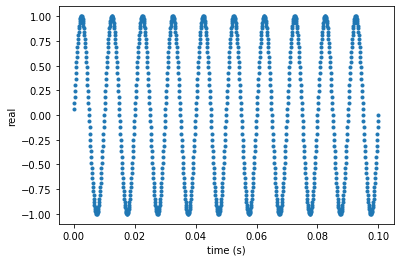

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

plot함수 2개의 입력값 
- x와 y 값
- x에 time또는 theta y에는 sin의 결과값 세번째 입력값은 무엇으로 plot화 할건지 

In [61]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

첫번째 줄 ploting할 때 쓰는 library 큰 라이브러리 이름은 matplotlib
* from으로 구분할 때는 제일 큰게 있고 그 다음 import를 통해 서브라이브러리
* import matplotlib.pyplot이랑 from matplotlib import pyplot이랑 같음 



# Phasor
관계에 대한 명확한 이해 무엇을 어떻게 변화면 어떤 변화가 생기는지

In [80]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 400.0     # sine frequency, Hz

나중에 amp sr dur freq를 바꿔도 결과값만 바뀌므로 편안함 이런걸 parameter라고 부름

In [81]:
theta = np.arange(0, 10*np.pi, 0.1)#np.arange 숫자 리스트 만들고 싶을 때 theta 최댓값 0부터 2pi 한바퀴만 돌게 됨 만약 10pi면 총 5번 돌음
theta #각도 값을 0부터 6까지 radian으로 정의한 것, 사인 함수에 넣을 준비 됨

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

 각도값, 가장 단순한 사인 코사인만 가지고 plotting을 했을 때 나오는 결과

Q. 어떻게 각도의 벡터를 만들 수 있을까 0부터 2pi

pi값 그냥 쓸 수 없음 np안에 저장되어있으므로 np.pi로!

In [82]:
s = np.sin(theta) #s는 signal
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

이 두개를 플랏을 하면 어떤 형태가 나올까? 사인 곡선


<IPython.core.display.Javascript object>


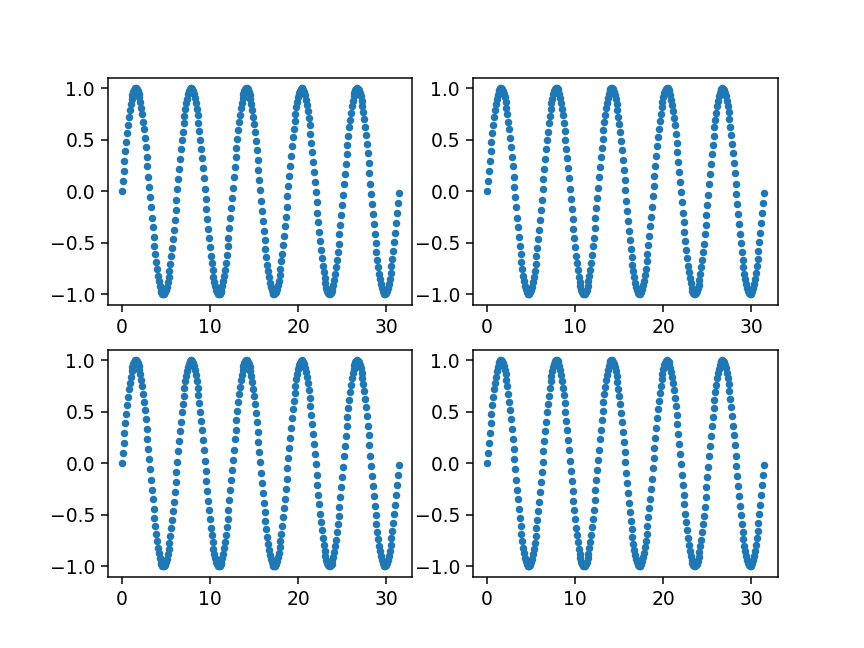

In [83]:
#plot하는 방법
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

- 네모 전체가 figure
- subplot 중간에 화면 분리를 해서 만들 수 있음
- figure 먼저 만들고 add_subplot으로 화면분리:221 은 2줄 2열로 화면분리를 한다 그 중에서 첫번째 것으로 선택을 한다 
- plot의 theta가 x 값, 각도값 s는 사인으로 해서 나온 output
- theta는 0부터 2pi까지 나온 것 y축은 theta가 사인 function으로 들어가서 나온 게 s값
- 점 태극 문양 -> 사인 함수
- 위 함수 좀 더 빽빽하게 만들어야 함 너무 떨어져 있음 조금 더 작게 해주기 by np.arange 값 조정
- theta = np.arange(0, 2*np.pi, 0.1)


<IPython.core.display.Javascript object>


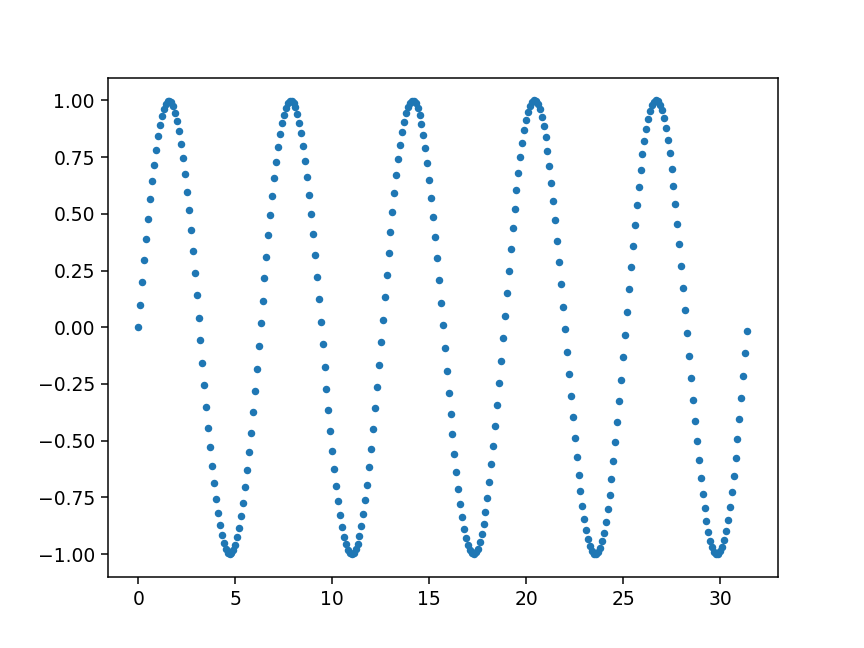

In [84]:
#plot하는 방법
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')

이 plot에서 x축이 무엇이고 y축이 뭔지 이름 달아주는 방법 by set_xlabel, set_ylabel

<IPython.core.display.Javascript object>


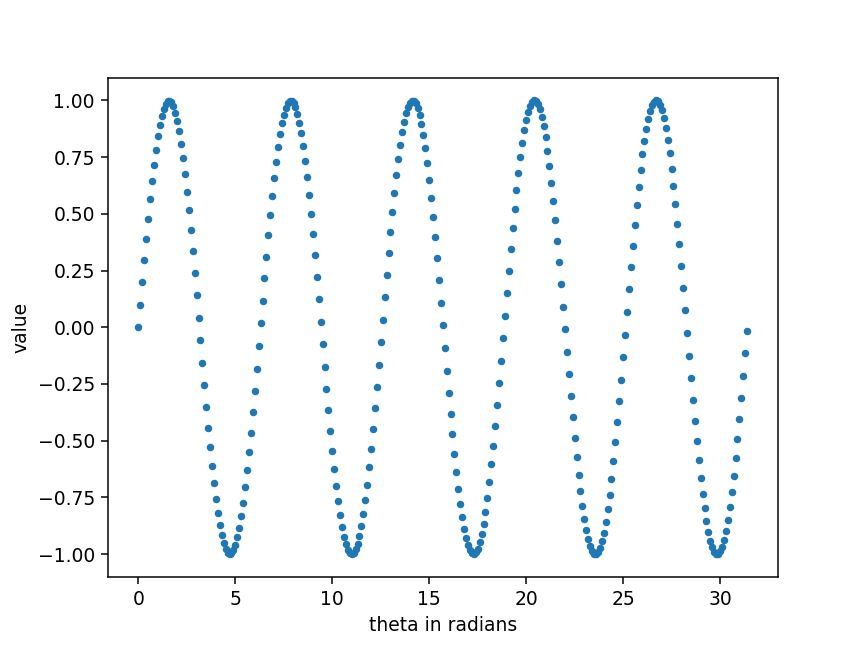

Text(0, 0.5, 'value')

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

- 0부터 2pi 까지, y축 상에서 equidistant한가? 아니다 non linear(=x와 y의 관계가 line이 아니다 y= ax+b가 line형태 이를 제외한 모든 함수들의 x와 y의 관계는 non linear함)
- 만약 x축과 y 축에서 모두 equidistant한 경우? linear한 경우 그렇고 linear하지 않은 경우에 그렇지 않음
- linear은 line의 형용사, 다시 말해 라인처럼 생긴것 y = 2x같은 것일 때 x의 변화과 equidistant하면 그것에 상응하는 y의 변화도 마찬가지로 equidistant함 
- 곡선으로 나타난다는 것 자체가 x의 equidistant한 성격이 y엔 반영되지 않는다는 뜻

<IPython.core.display.Javascript object>


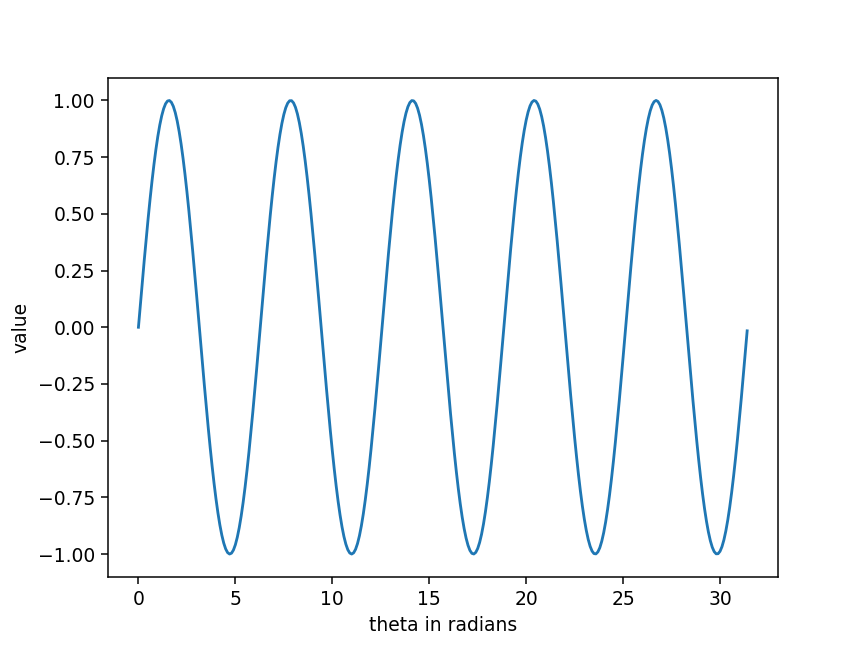

Text(0, 0.5, 'value')

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s) #default는 선형태로 나타남
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

- 위의 내용들 시간이 빠져있음
- 그러나 시간의 개념이 없으면 소리는 절대로 만들어질 수 없음, 소리는 시간이 있어야 함
- 만약 ~만큼이 1초라면,,,의 개념이 필요함 theta의 변화는 반드시 들어가야하며 마찬가지로 시간도 반드시 들어가야 함 -> 시간부터 먼저 만들기!

In [87]:
t = np.arange(1, sr*dur*1)/sr

np.arrange(1, sr): 만약 1초라면 time tick을 총 몇 개 만드는 것? time tick의 개수는 sampling rate와 일치함 sampling rate만큼의 time tick을 만드는 것
np.arange(1, sr*dur): 1초가 아닌 경우 더 작아져야 함 ->dur이라고 적어야 함 dur의 비율이 반영되어 sampling rate만큼 time tick 만들어짐
np.arange(1, sr*dur)/sr: time tick자체가 시간은 아님 이게 초로 바뀌려면 /sr 초로 나눠줘야함

In [88]:
theta = t * 2*np.pi * freq   

- theta에 time을 연동시키는(associate) 작업
- time 0부터 1초까지 만들어졌다고 생각했을 때 1에 2pi, 한바퀴 도는 것을 만들라는 뜻 ex.만약 100바퀴 돌게끔 만들고 싶으면 freq로 조정

In [89]:
s = np.sin(theta)

- 마찬가지로 time이 연동된 theta를 sin으로 갖는 signal
- time, theta, s 모두 갖춤
- theta가 어떻게 바뀌는지는 쉽게 확인할 수 있음 바퀴수 그러므로 실제 plot할 때는 x축에 theta가 아닌 time을 씀
- 실제의 소리를 만들 때는 time이 필요하므로 x에 time 적음
- 대괄호 없으면 모든 벡터 대괄호 쓰면 일부 벡터만

<IPython.core.display.Javascript object>


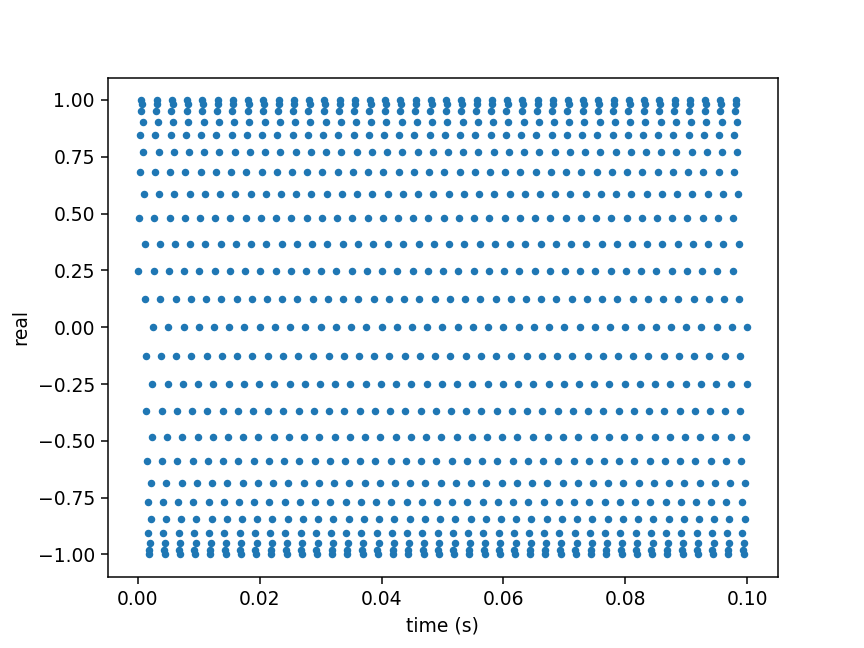

Text(0, 0.5, 'real')

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #0번째부터 1000번째 까지 t와 s의 개수가 같아야 ( , )이 상응하며 찍힘, 찍힐 수 있는 점의 개수 1000개
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

ValueError: x and y must have same first dimension, but have shapes (1000,) and (999,)

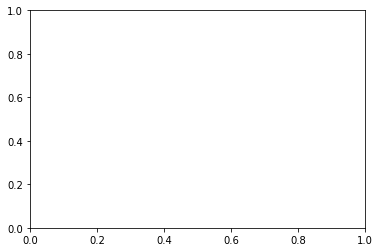

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[1:1000], '.') #둘의 개수 다르면 실행 안됨
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

<IPython.core.display.Javascript object>


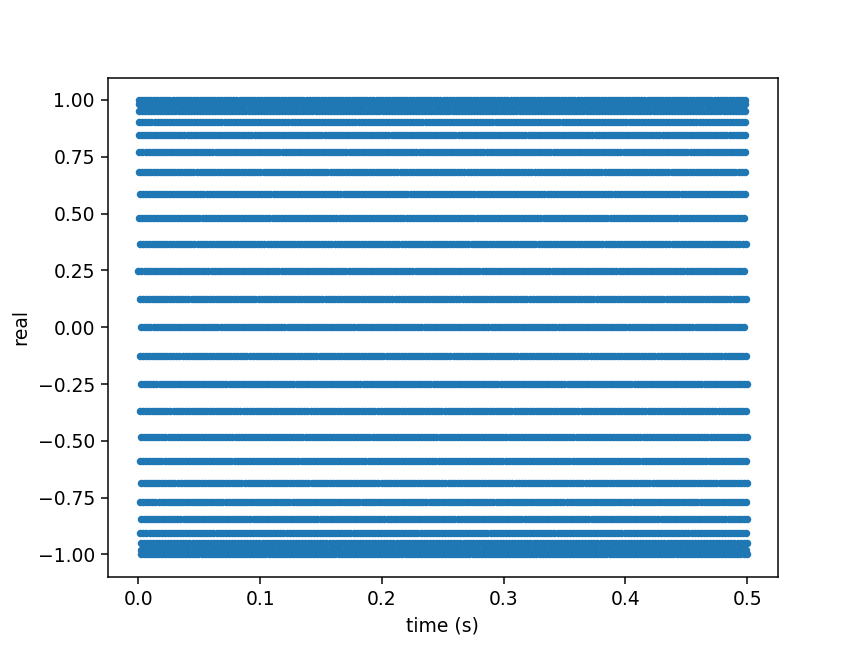

Text(0, 0.5, 'real')

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s, '.') #t전체와 s전체하면 너무 빽빽해서 확인 불가능하기 때문에 둘이 똑같은 범위로 한정해서 확인함
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [77]:
c = np.exp(theta*1j)
c

array([0.99802673+0.06279052j, 0.9921147 +0.12533323j,
       0.98228725+0.18738131j, ..., 0.98228725-0.18738131j,
       0.9921147 -0.12533323j, 0.99802673-0.06279052j])

- exp = exponation
- c는 complex, 하나하나의 값 엄청 긴 벡터인데 생략이 된것 a + bi의 형태  ~.~의 공통된 형식 표기방법 왜 이렇게 하냐면 이렇게 함으로써 쓰는 숫자 및 정보의 양이 똑같기 때문 i를 썼으므로 복수수의 형태로 c가 출력됨 실제로 계산해보니 이러한 값들이 나옴
- np.exp가 e라는 숫자 함수 안에 들어가는 것이 theta * 1j j = i
- sin과 마찬가지로 다 고정이고 theta만 입력으로 들어감
- 이것을 과연 어떻게 plot을 할까?

<IPython.core.display.Javascript object>


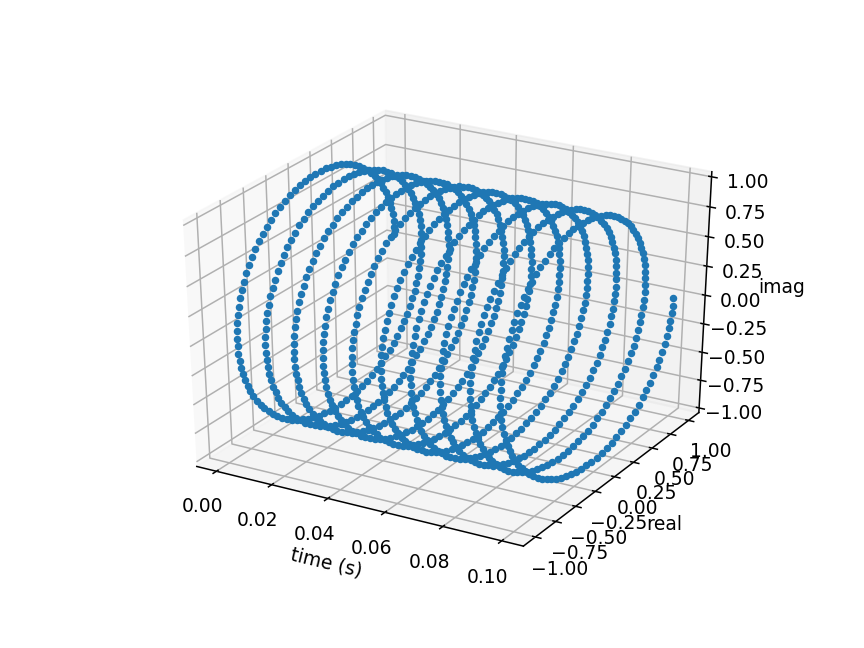

Text(0.5, 0, 'imag')

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #각각 차례 있음 t와 c.real, c.imag의 첫번째, 두번째...각각 한 점 총 1000개의 점
ax.set_xlabel('time (s)') 
ax.set_ylabel('real') #위의 c 값이 a+b으로 존재 이것을 분할 해서 c.real이 a c.real이라고 하면 a 값만 쏙 빼옴 c.imag는 b
ax.set_zlabel('imag')

<IPython.core.display.Javascript object>


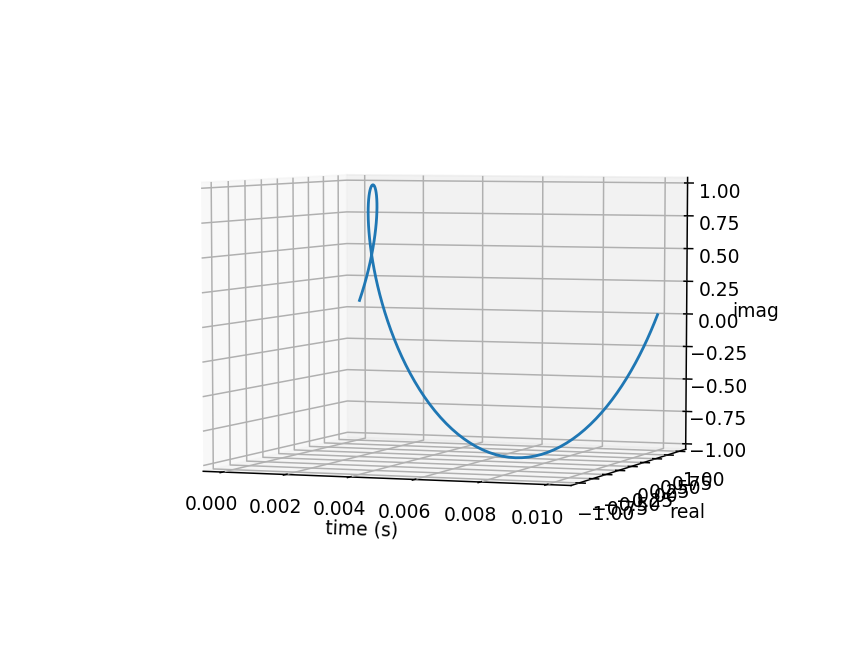

Text(0.5, 0, 'imag')

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '-') #각각 차례 있음 t와 c.real, c.imag의 첫번째, 두번째...각각 한 점 총 1000개의 점
ax.set_xlabel('time (s)') 
ax.set_ylabel('real') #위의 c 값이 a+b으로 존재 이것을 분할 해서 c.real이 a c.real이라고 하면 a 값만 쏙 빼옴 c.imag는 b
ax.set_zlabel('imag')

1. figure먼저 만들고 subplot만듦
2. 3d로 입력이 들어가야함 cf. 2d입력은 입력이 2개 t와 s 2차원으로 들어감 2차원: 하나의 점 a, b로 2차원의 숫자가 들어간다는 뜻 여기서는 3차원이므로 3개의 입력이 들어가야 함 한 점 (a, b, c)

반드시 원점 존재하고 원점으로부터 얼만큼 떨어져있는지를 세개의 값으로 표현할 수 있음

오일러 공식


cos이라고 하는 부분은 real 파트와 관련이 되고 sin부분이 imaginary부분과 관련 있음

- real만 보는 방법
- imaginary만 보는 방법

In [93]:
ipd.Audio(s, rate=sr)

- audio를 플레이 하기 위해서는 ipd를 import 해야 함
- s대신 c.imag나 c.real 넣어도 오디오 출력됨

In [94]:
ipd.Audio(c.imag, rate=sr)

In [95]:
ipd.Audio(c.real, rate=sr)

# Preview

- praat으로 여러가지 pure tone만드는 것 해봤는데 이제는 이것을 코딩으로 만들어보는 것
- 이 다음으로는 코딩으로 spectrogram을 주파수 별로 분석
- 복습과 예습
- helper function
- 과제